# Session 6: Python functions, and interactive plots
Louise Dash, 2nd November 2018

### Learning objectives

By the end of this session, you should
* Be familiar with the basic structure, usage and implementation of user-defined Python functions
* Have a basic understanding of how to create interactive plots

## Introduction

We'll be doing plotting in this session, so we'll start by immediately importing numpy and matplotlib. There's a few more things we'll introduce and import later on, so watch out for them!

In sessions 4 and 5 we used the `%matplotlib notebook` backend for plotting, but the widgets we'll be using in this session work best when we use the `%matplotlib inline` backend, which is what we'll use here.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


### Python functions
Sometimes, we'll want to do some task many times, but a loop structure isn't appropriate.

In these cases, we can write our own functions, and call them just like python's inbuilt functions.

For example, look at the sinc function:

$$\text{sinc}(x) = \frac{\sin(x)}{x}$$

We can write a Python function that will calculate this, and which we can then call when needed using sincfn(value)

In [2]:
def sincfn(x):
    """Returns sin(x)/x for the input x"""
    sincx = np.sin(x) / x
    return sincx


How does this work?
* The first line defines the name of the function (in this case, sincfn), and includes the arguments, or inputs to the function, in parentheses. In this case, there is just one argument (`x`), which can be either a single number, or, as we will see below, an entire numpy array of numbers.
* The first line ends with a colon, just like a while loop or if statement.
* Likewise, the following lines are all indented to show that they belong to the function
* The second line is a docstring, which helps document the function:
 It is enclosed by three quotation marks. This is the text that will be displayed as help for the function.
    * **All functions that you write should include a docstring** (more complicated functions will also require some #comments as well, of course). 
* The third line is the definition of the function itself. In this simple example, we only need one line of code, but functions can include as many lines of code as needed.
* The fourth line contains the keyword "return". This tells Python to return the following value(s) as output from the function.

Note that the "x" in this function is a _local_ variable, which is only defined within the function. When we call the function we don't need to use the variable name x: "sincfn(bananas)" or "sincfn(whatever)" will work as long as the variable is properly defined.


### How to call a function:
If we run just the example function as written above (try it!), it doesn't do anything. This is because we need to call the function.

But once the function is defined, we can call it from anywhere else in the same Jupyter notebook or standalone .py code. (You can also combine functions into a separate module and import them, but we won't cover that here.)

For example, now we've defined our sincfn, we can use it:

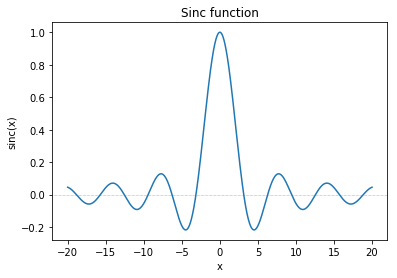

In [3]:
xpoints = np.linspace(-20,20,1000) # grid of x data

# Now we call the function.
# Notice that we are sending a numpy array to the function,
# thus ypoints will also be a numpy array with the same dimensions as xpoints.
ypoints = sincfn(xpoints) # the function to plot   

plt.plot(xpoints,ypoints)
plt.title("Sinc function")
plt.xlabel("x")
plt.ylabel("sinc(x)")
plt.axhline(linewidth=0.5,ls=':'); # adds a fine dotted line along axis


**Things to note here:**

* The function works not just for a single value of `x`, but can also be called with an array of x-values, as here.
* The function is called just like a built-in function.
* By convention, functions are usually included at the start of the program file (for a standalone code), after any import commands but before the main body of the code. In practice you may want to place them elsewhere to make the code more readable (especially in the case of a Jupyter Notebook), but in any case they *must* be defined before the point in the code where they are used. 


**Be careful:**

* Watch out for how you define the function. What happens here if we call sincfn(0)? (Try it, if it's not obvious.) How could we avoid this?
* Numpy contains its own `sinc` function. If we'd named our function `sinc`, this may have caused confusion and possible errors: Choose function names carefully, make sure they don't clash with inbuilt functions. By using "`import numpy as np`", we (at least partly) avoid this problem, as the numpy `sinc` function would be called as `np.sinc`, not as `sinc.` This is why it's better to import modules using "`import numpy as np`" etc, rather than "`from numpy import *`"

## Sliders and other widgets

Now we're going to look in a bit more detail about how we can interact with plots using the widgets and sliders we saw in the least-squares visualisation code from Session 5.


### Sample widget code for a sin function, with a slider to adjust the phase

Here's a much simpler example than the interactive least squares code.

This code plots a sin function
$$y = \sin(x + \phi),$$
and includes a slider that changes the phase $\phi$. 

The first thing to do is import the necessary interactive functions.





In [2]:
from ipywidgets import interactive
from IPython.display import display

Now we can set up the initial data - all we need here are some x-values for the plot.

In [5]:
### Set up the initial data:

x = np.linspace(0,25,1000) # grid of x data


Now we need to define a function that will redraw the plot when the slider position is changed (because, as noted above, we need to make sure that the function is defined before we can call it). This function is called when the slider (defined in the next-but-one cell) is moved to position `phi`. The function takes the value of `phi` as the current phase, and recalculates $y = \sin(x + \phi)$ for this phase, then redraws the new function on the plot.

In [4]:
def plot_phase(phi):
    """
    function to draw plot based on current slider phase position phi
    Requires that the global variable x is already defined.
    """
    y = np.sin(x + phi) # calculate the y-values based on current phase from slider
    plt.plot(x, y, linewidth=1, color='r') 
    plt.ylabel("sin(x + $\phi$)")
    plt.xlabel("x")
    plt.title("Variation of sin function with phase $\phi$")
    # The next line is only strictly necessary if you're using older versions of Anaconda
    # however on an up-to-date installation it doesn't cause any problems
    plt.show() 
    

Now we've defined the function, we can set up the plot. This is code you'll be able to reuse later, and is reasonably intuitive. The first line of the cell uses the `interactive` function we imported from IPython widgets / ipywidgets to call our `plot_phase` function. The second line displays it. Note how the limits and step-size for the slider are specified in the first line.

(n.b. In this case we haven't specified the initial value of the slider. It is possible to do that, but in the interests of keeping things simple, we've just gone with the default.)

In [3]:
# generate interactive plot
sin_phase_plot = interactive(plot_phase, phi=(0,4*np.pi,0.1))
display(sin_phase_plot)

NameError: name 'plot_phase' is not defined

Experiment with this before moving onto the next section:

* Change the limits on the values of x (using linspace) to get more or fewer cycles on the plot.
* Change the limits on the slider.


## Task: An interactive Fourier series square wave 

Now we've (hopefully) got the hang of how the sliders work, we can use them to visualise an important concept in Physics.

### Fourier series
Fourier's theorem says that any periodic function can be decomposed into the sum of sine and cosine functions. This is something you'll study in more depth in the Waves, Optics and Acoustics module PHAS0005 (if you're taking it) and will also come across in maths courses. We won't go into the full details of all the maths here, we just want to be able to understand the concept better by visualising it using Python

We're going to see how this works by creating a square wave, like this:

<img src="./squarewave.png" width=400>

*(if you can't see this image download the separate image file from Moodle)*



from a Fourier series of sine functions, and use the slider to control the number of terms in the series. This will enable us to visualise exactly how the square wave is built up from sine waves of different frequencies and amplitudes. 

The Fourier series for a square wave is given by:

$$f_\text{square}(x) = \frac{4}{\pi} \sum_{n = 1, 3, 5, \ldots}^{\infty} \frac{1}{n} \sin\left(\frac{n \pi x}{L}\right)$$

where the period of the function is $[-L,L]$.  The $\frac{4}{\pi}$  outside the summation ensures that the amplitude of the square wave is 1. Note that each additional term in the series has a smaller amplitude (due to the 1/n term) and is also higher in frequency.

### What you need to do:

Download the Session 6 task template notebook from Moodle. This is an incomplete code - your job is to complete it! The template contains full instructions in the green cells. 


